### Importing necessary Libraries

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [273]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [274]:
##Reading the data

ch = pd.read_csv("D:\\Upgrad\\Machine Learning 2\\telecom-churn-case-study-hackathon-38\\train.csv")

In [275]:
ch.head(2)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.0,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.0,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.2,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.0,3.26,24.76,24.71,0.0,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.0,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.4,3.44,39.44,25.03,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.0,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.0,

In [276]:
ch_original= ch

### Data understanding and imputation

In [277]:
#checking the datatypes of the variables
ch.info(verbose = 1 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [278]:
# Looking at the percentage of null values
ch.isnull().sum() * 100 / ch.shape[0]

id                          0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.002871 
std_og_t2o_mou              1.002871 
loc_ic_t2o_mou              1.002871 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.570008 
last_date_of_month_8        1.047158 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
onnet_mou_6                 3.954342 
onnet_mou_7                 3.838626 
onnet_mou_8                 5.290076 
offnet_mou_6                3.954342 
offnet_mou_7                3.838626 
offnet_mou_8                5.290076 
roam_ic_mou_6               3.954342 
roam_ic_mou_7               3.838626 
roam_ic_mou_8               5.290076 
roam_og_mou_6               3.954342 
roam_og_mou_7               3.838626 
roam_og_mou_8               5.290076 
loc_og_t2t_mou_6            3.954342 
loc_og_t2t_mou_7            3.838626 
loc_og_t2t_mou_8            5.290076 
loc_og_t2m_m

In [279]:
ch.shape

(69999, 172)

In [280]:
#Some recharge columns are blank . Also the date is blank for these fields so that implies that the individual has not rechared
ch.loc[ch.total_rech_data_6.isnull() & ch.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In [281]:
#Some recharge columns are blank . Also the date is blank for these fields so that implies that the individual has not rechared
ch.loc[ch.total_rech_data_7.isnull() & ch.date_of_last_rech_data_7.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7"]].head(20)

,total_rech_data_7,date_of_last_rech_data_7
0,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In [282]:
#Some recharge columns are blank . Also the date is blank for these fields so that implies that the individual has not rechared
ch.loc[ch.total_rech_data_8.isnull() & ch.date_of_last_rech_data_8.isnull(), ["total_rech_data_8", "date_of_last_rech_data_8"]].head(20)

,total_rech_data_8,date_of_last_rech_data_8
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [283]:
#We can impute zeros in the null columns for recharge and date fields

impute_0 = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [284]:
# impute missing values with 0
ch[impute_0] = ch[impute_0].apply(lambda x: x.fillna(0))

In [285]:
ch[impute_0].isnull().sum()*100/ch.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [286]:
# Segregating columns like id and dates now we can create some column name list by there types using description of columns
id_cols = ['id', 'circle_id']


In [287]:
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

In [288]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

In [289]:
num_cols = [column for column in ch.columns if column not in id_cols + date_cols + cat_cols]

In [290]:
# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6


In [291]:
# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == ch.shape[1])

True


In [292]:
#drop id and date columns
ch = ch.drop(id_cols + date_cols, axis=1)
ch.shape

(69999, 161)

In [293]:
#Replace the missing value withj -1 for categorical columns
ch[cat_cols] = ch[cat_cols].apply(lambda x: x.fillna(-1))

In [294]:
ch[cat_cols].isnull().sum()*100/ch.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [295]:
#Dropping values with more than 70% missing values

# Looking at the percentage of null values
ch.isnull().sum() * 100 / ch.shape[0]

loc_og_t2o_mou        1.002871 
std_og_t2o_mou        1.002871 
loc_ic_t2o_mou        1.002871 
arpu_6                0.000000 
arpu_7                0.000000 
arpu_8                0.000000 
onnet_mou_6           3.954342 
onnet_mou_7           3.838626 
onnet_mou_8           5.290076 
offnet_mou_6          3.954342 
offnet_mou_7          3.838626 
offnet_mou_8          5.290076 
roam_ic_mou_6         3.954342 
roam_ic_mou_7         3.838626 
roam_ic_mou_8         5.290076 
roam_og_mou_6         3.954342 
roam_og_mou_7         3.838626 
roam_og_mou_8         5.290076 
loc_og_t2t_mou_6      3.954342 
loc_og_t2t_mou_7      3.838626 
loc_og_t2t_mou_8      5.290076 
loc_og_t2m_mou_6      3.954342 
loc_og_t2m_mou_7      3.838626 
loc_og_t2m_mou_8      5.290076 
loc_og_t2f_mou_6      3.954342 
loc_og_t2f_mou_7      3.838626 
loc_og_t2f_mou_8      5.290076 
loc_og_t2c_mou_6      3.954342 
loc_og_t2c_mou_7      3.838626 
loc_og_t2c_mou_8      5.290076 
loc_og_mou_6          3.954342 
loc_og_m

In [296]:
drop_cols1= ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8']

In [297]:
ch = ch.drop(drop_cols1, axis=1)

In [298]:
ch.shape

(69999, 149)

In [299]:
#imputing with meadian for the remaining num_cols

new_num_cols = [column for column in ch.columns if column not in id_cols + date_cols + cat_cols]
ch[new_num_cols] = ch[new_num_cols].apply(lambda x: x.fillna(x.median()))

In [300]:
#checking missing values
ch.isnull().sum()*100/ch.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

### Checking for high value customer 

In [301]:

#Creating new columns Total recharge amount for month 6 and 7 and 8
ch['total_data_rech_6'] = ch.total_rech_data_6 * ch.av_rech_amt_data_6
ch['total_data_rech_7'] = ch.total_rech_data_7 * ch.av_rech_amt_data_7
ch['total_data_rech_8'] = ch.total_rech_data_8 * ch.av_rech_amt_data_8

In [302]:
# Creating new columns total data recharge and total recharge for each month
ch['amt_data_6'] = ch.total_rech_amt_6 + ch.total_data_rech_6
ch['amt_data_7'] = ch.total_rech_amt_7 + ch.total_data_rech_7
ch['amt_data_8'] = ch.total_rech_amt_8 + ch.total_data_rech_8

In [303]:
#Average recharge done by customer in June and July and august
ch['av_amt_data_6_7_8'] = (ch.amt_data_6 + ch.amt_data_7+ch.amt_data_8)/3

In [304]:
#70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(ch.av_amt_data_6_7_8.quantile(0.7)))

Recharge amount at 70th percentile: 484.3333333333333


In [305]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
ch_new = ch.loc[ch.av_amt_data_6_7_8 >= ch.av_amt_data_6_7_8.quantile(0.7), :]
ch_new = ch_new.reset_index(drop=True)

In [306]:
ch_new.shape

(21001, 156)

In [307]:
#Dropping variables which were used to create high- value customers
# delete variables created to filter high-value customers
ch_new = ch_new.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7_8','total_data_rech_8','amt_data_8'], axis=1)

In [308]:
ch_new.shape

(21001, 149)

In [309]:
#Dropping variables which were used to create the derived columns
ch_new.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7','av_rech_amt_data_8','total_rech_data_8'], axis=1, inplace=True)

In [310]:
ch_new.shape

(21001, 141)

0    28.206117
1    1.795740 
Name: churn_probability, dtype: float64


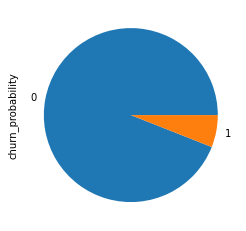

In [311]:
# lets find out churn/non churn percentage
print((ch_new['churn_probability'].value_counts()/len(ch))*100)
((ch_new['churn_probability'].value_counts()/len(ch))*100).plot(kind="pie")
plt.show()

In [312]:
#Creating a list of column names for each month
mon_6_cols = [col for col in ch_new.columns if '_6' in col]
mon_7_cols = [col for col in ch_new.columns if '_7' in col]
mon_8_cols = [col for col in ch_new.columns if '_8' in col]

In [313]:
mon_6_cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'max_rech_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

### Checking correlation

In [314]:
ch_corr = ch_new.corr()
ch_corr.loc[:,:] = np.tril(ch_corr, k=-1)
ch_corr = ch_corr.stack()
ch_corr
ch_corr[(ch_corr > 0.80) | (ch_corr < -0.80)].sort_values(ascending=False)

fb_user_6         night_pck_user_6    0.959529
fb_user_7         night_pck_user_7    0.955332
total_rech_amt_8  arpu_8              0.955004
isd_og_mou_8      isd_og_mou_7        0.951444
fb_user_8         night_pck_user_8    0.948837
isd_og_mou_7      isd_og_mou_6        0.937425
isd_og_mou_8      isd_og_mou_6        0.930381
total_ic_mou_8    loc_ic_mou_8        0.896074
total_ic_mou_6    loc_ic_mou_6        0.894281
total_ic_mou_7    loc_ic_mou_7        0.882938
std_og_t2t_mou_8  onnet_mou_8         0.860372
std_og_t2m_mou_8  offnet_mou_8        0.860292
std_og_t2t_mou_7  onnet_mou_7         0.859905
std_og_t2t_mou_6  onnet_mou_6         0.858713
std_og_t2m_mou_7  offnet_mou_7        0.858636
total_og_mou_8    std_og_mou_8        0.853326
loc_ic_mou_6      loc_ic_t2m_mou_6    0.852399
total_og_mou_7    std_og_mou_7        0.850386
loc_ic_mou_8      loc_ic_t2m_mou_8    0.846146
loc_ic_mou_7      loc_ic_t2m_mou_7    0.842134
std_ic_mou_8      std_ic_t2m_mou_8    0.839696
loc_ic_mou_8 

In [315]:
#Drop columns with more tha 88% correlation
drop_cols2= ['fb_user_6','fb_user_7','total_rech_amt_8','isd_og_mou_8','fb_user_8' ,'isd_og_mou_7','isd_og_mou_8','total_ic_mou_8','total_ic_mou_6','total_ic_mou_7']
      
ch_new.drop(drop_cols2, axis=1, inplace=True)

In [316]:
ch_new.shape

(21001, 132)

### Data preparation- creating derived columns

In [317]:
# A new variable 'tenure' can be derived
ch_new['tenure'] = (ch_new['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
ch_new.drop('aon',axis=1, inplace=True)

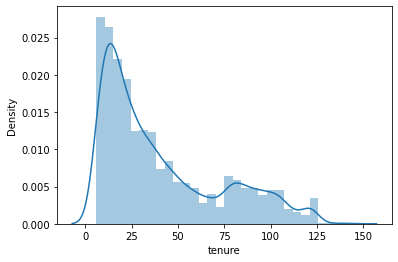

In [318]:
sns.distplot(ch_new['tenure'],bins=30)
plt.show()

In [319]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
ch_new['tenure_range'] = pd.cut(ch_new['tenure'], tenure_range, labels=tenure_label)
ch_new['tenure_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    NaN    
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

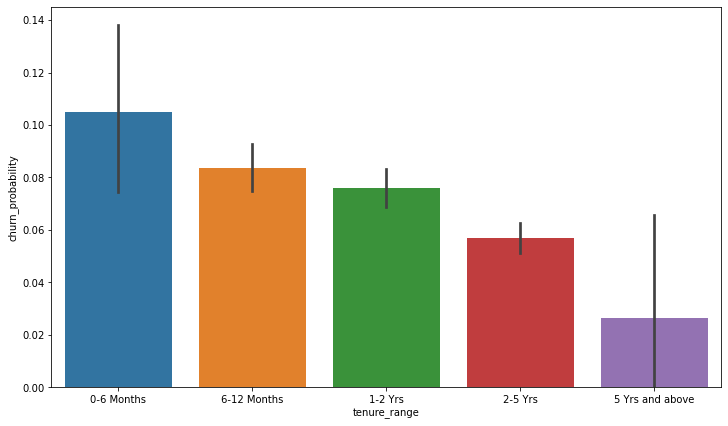

In [320]:
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=ch_new)
plt.show()

In [321]:
# As we can see above Maximum churn rate happens in the month 0-6 and gradually decreases

In [322]:
#Calculating the average revenue
ch_new["avg_arpu_6_7_8"]= (ch_new['arpu_6']+ch_new['arpu_7']+ch_new['arpu_8'])/3
ch_new['avg_arpu_6_7_8'].head()

0    156.821333
1    432.043000
2    838.738667
3    458.105667
4    387.591333
Name: avg_arpu_6_7_8, dtype: float64

In [323]:
#Dropping avg revenue columns for 6 and 7 months
ch_new.drop(['arpu_6','arpu_7','arpu_8'], axis=1, inplace=True)

In [324]:
ch_new.shape

(21001, 131)

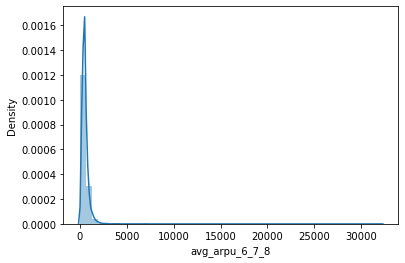

In [325]:
#Visualizing the average revenue columns
sns.distplot(ch_new['avg_arpu_6_7_8'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

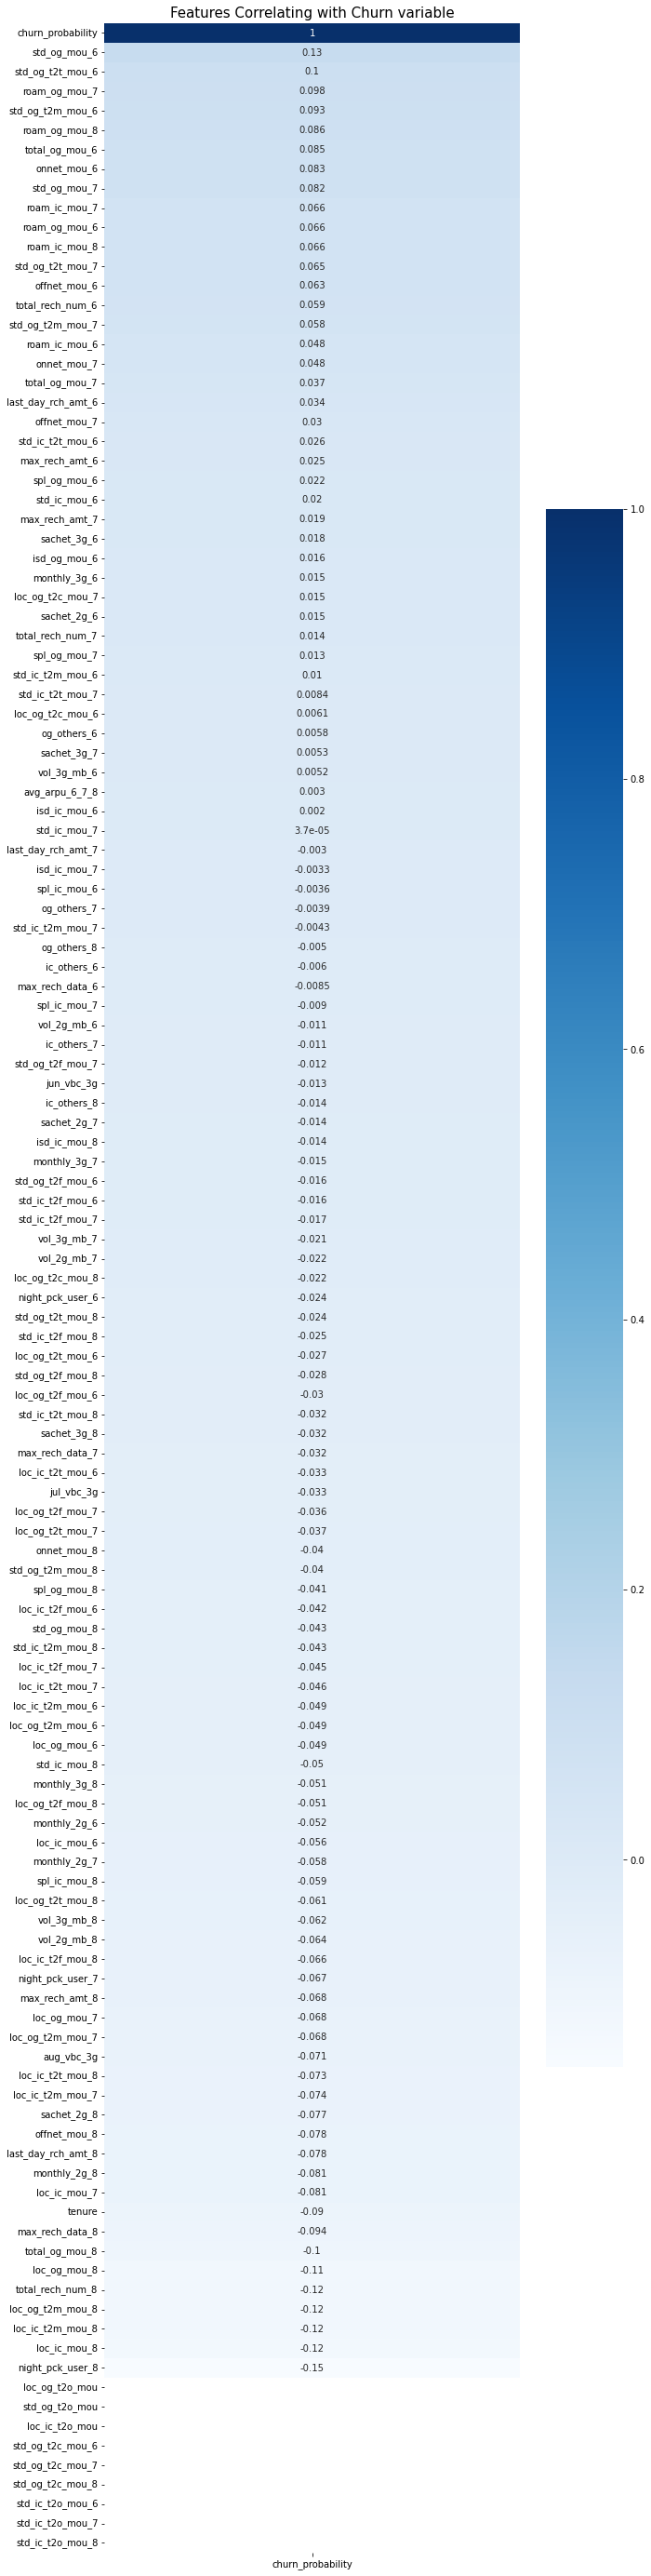

In [326]:
# Checking correlation between churn_probablity and other variables
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(ch_new.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True,cmap='Blues')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [327]:
#Dropping few more columns as the values are 0 or blank

ch_new.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis= 1, inplace = True)

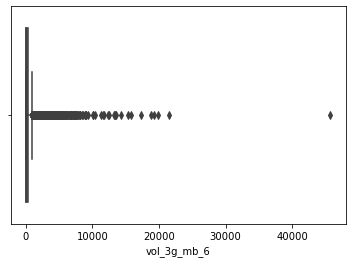

In [328]:
sns.boxplot(ch_new.vol_3g_mb_6)
plt.show()

<AxesSubplot:xlabel='aug_vbc_3g'>

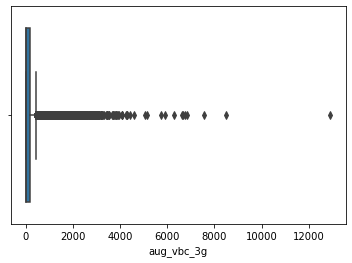

In [329]:
sns.boxplot(ch_new.aug_vbc_3g)

In [330]:
# Cap outliers
 
for col in ch_new.columns:
    percentiles = ch_new[col].quantile([0.01, 0.99]).values
    ch_new[col] = np.clip(ch_new[col], percentiles[0], percentiles[1])

In [331]:
ch_new.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21001 entries, 0 to 21000
Data columns (total 128 columns):
 #    Column              Dtype   
---   ------              -----   
 0    onnet_mou_6         float64 
 1    onnet_mou_7         float64 
 2    onnet_mou_8         float64 
 3    offnet_mou_6        float64 
 4    offnet_mou_7        float64 
 5    offnet_mou_8        float64 
 6    roam_ic_mou_6       float64 
 7    roam_ic_mou_7       float64 
 8    roam_ic_mou_8       float64 
 9    roam_og_mou_6       float64 
 10   roam_og_mou_7       float64 
 11   roam_og_mou_8       float64 
 12   loc_og_t2t_mou_6    float64 
 13   loc_og_t2t_mou_7    float64 
 14   loc_og_t2t_mou_8    float64 
 15   loc_og_t2m_mou_6    float64 
 16   loc_og_t2m_mou_7    float64 
 17   loc_og_t2m_mou_8    float64 
 18   loc_og_t2f_mou_6    float64 
 19   loc_og_t2f_mou_7    float64 
 20   loc_og_t2f_mou_8    float64 
 21   loc_og_t2c_mou_6    float64 
 22   loc_og_t2c_mou_7    float64 
 23   loc_og_t2

In [332]:
# Dropping the derived categorical variables
ch_new.drop(['tenure_range'], axis= 1, inplace = True)

In [333]:
ch_new.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21001 entries, 0 to 21000
Data columns (total 127 columns):
 #    Column              Dtype  
---   ------              -----  
 0    onnet_mou_6         float64
 1    onnet_mou_7         float64
 2    onnet_mou_8         float64
 3    offnet_mou_6        float64
 4    offnet_mou_7        float64
 5    offnet_mou_8        float64
 6    roam_ic_mou_6       float64
 7    roam_ic_mou_7       float64
 8    roam_ic_mou_8       float64
 9    roam_og_mou_6       float64
 10   roam_og_mou_7       float64
 11   roam_og_mou_8       float64
 12   loc_og_t2t_mou_6    float64
 13   loc_og_t2t_mou_7    float64
 14   loc_og_t2t_mou_8    float64
 15   loc_og_t2m_mou_6    float64
 16   loc_og_t2m_mou_7    float64
 17   loc_og_t2m_mou_8    float64
 18   loc_og_t2f_mou_6    float64
 19   loc_og_t2f_mou_7    float64
 20   loc_og_t2f_mou_8    float64
 21   loc_og_t2c_mou_6    float64
 22   loc_og_t2c_mou_7    float64
 23   loc_og_t2c_mou_8    float64
 24   

### Train test split

In [334]:
# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [335]:
# divide data into train and test
X = ch_new.drop("churn_probability", axis = 1)
y = ch_new.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [336]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15750,)
(5251, 126)
(5251,)


### Scaling 

In [337]:
num_col2 = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [338]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col2] = scaler.fit_transform(X_train[num_col2])

In [339]:
X_train.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7_8
1217,0.026687,0.042875,0.080465,0.141771,0.128744,0.207332,0.120735,0.000000,0.076049,0.014092,0.000000,0.042324,0.013208,0.051999,0.038073,0.059593,0.052431,0.166290,0.123106,0.063784,0.034487,0.0,0.000000,0.0,0.050506,0.066466,0.131519,0.020850,0.022779,0.066994,0.128808,0.115927,0.139927,0.0,0.000000,0.000000,0.0,0.0,0.0,0.105997,0.100580,0.143189,0.0,0.000000,0.000000,0.021841,0.0,0.0,0.0,0.119595,0.122427,0.190696,0.048613,0.195063,0.039936,0.028621,0.106380,0.086673,0.000000,0.000000,0.000000,0.040487,0.158926,0.075755,0.015328,0.009498,0.088179,0.049058,0.054546,0.183552,0.0,0.00000,0.0,0.0,0.0,0.0,0.038850,0.041323,0.164521,0.328125,0.0,0.0,0.00000,0.0,0.000000,0.027095,0.023666,0.0,0.066667,0.042553,0.000000,0.55,0.550,0.550,0.000000,0.000000,0.839695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.344828,0.184416
14763,0.047423,0.079941,0.033168,0.114969,0.054821,0.084596,0.000000,0.000000,0.063496,0.000000,0.000000,0.114106,0.035000,0.019723,0.015991,0.068545,0.039686,0.059608,0.000940,0.001826,0.109979,0.0,0.000000,0.0,0.062419,0.036575,0.053460,0.035560,0.083203,0.026841,0.074145,0.036027,0.032615,1.0,0.301639,0.260834,0.0,0.0,0.0,0.094439,0.086363,0.044553,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.116307,0.094255,0.065499,0.196721,0.201540,0.055940,0.109635,0.070250,0.053742,0.004213,0.008265,0.006134,0.160193,0.138625,0.061314,0.252463,0.304901,0.258941,0.218576,0.373020,0.041201,1.0,0.00000,1.0,0.0,0.0,0.0,0.360635,0.373496,0.237367,0.000000,0.0,0.0,0.01182,0.0,0.006865,0.000000,0.000000,0.0,0.111111,0.106383,0.044444,0.25,0.350,0.250,0.000000,0.534351,0.381679,0.334066,0.338462,0.338462,0.001977,0.000636,0.020025,0.104547,0.074047,0.026221,0.5,0.5,0.5,0.0,0.5,0.5,0.083333,0.0,0.0,0.000000,0.0,0.0,0.25,0.0,0.0,0.041136,0.063169,0.029140,0.482759,0.198835
8536,0.038690,0.028741,0.036368,0.590725,1.000000,0.236893,0.771185,0.430828,0.163395,1.000000,1.000000,0.475899,0.069506,0.050501,0.069281,0.543804,1.000000,0.301464,0.009162,0.021223,0.004148,0.0,0.177502

In [340]:
#Data Imbalance Handling using SMOTE
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [341]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (29614, 126)
Dimension of y_train_sm Shape: (29614,)


### Logistic regression

In [342]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                29614
Model:                            GLM   Df Residuals:                    29495
Model Family:                Binomial   Df Model:                          118
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10848.
Date:                Wed, 17 Aug 2022   Deviance:                       21696.
Time:                        21:35:46   Pearson chi2:                 1.77e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6508      0.067     24.514      0.000       1.519       1.783
onnet_mou_6            1.0422      1.116      0.934      0.350      -1.145       3.229
onnet_mou_7            5.9201      1.255      4.719      0.000       3.461       8.379
onnet_mou_8            0.6950      1.271      0.547      0.584      -1.795       3.185
offnet_mou_6           2.2023      1.061      2.076      0.038       0.123       4.282
offnet_mou_7           9.0744      1.241      7.311      0.000       6.642      11.507
offnet_mou_8           0.0188      1.063      0.018      0.986      -2.064       2.102
roam_ic_mou_6          0.1114      0.241      0.462      0.644      -0.362       0.585
roam_ic_mou_7          1.1388      0.262      4.350      0.000       0.626       1.652
roam_ic_mou_8         -0.9898      0.242     -4.094      0.000      -1.464      -0.516
roam_og_mou_6         -0.0447      0.329     -0.136      0.892      -0.689       0.600
roam_og_mou_7         -2.7521      0.325     -8.463      0.000      -3.389      -2.115
roam_og_mou_8          2.0763      0.296      7.008      0.000       1.496       2.657
loc_og_t2t_mou_6       0.6514      0.915      0.712      0.476      -1.141       2.444
loc_og_t2t_mou_7       0.0847      0.996      0.085      0.932      -1.867       2.036
loc_og_t2t_mou_8      -8.0450      1.089     -7.390      0.000     -10.179      -5.911
loc_og_t2m_mou_6       0.4663      0.955      0.488      0.625      -1.405       2.338
loc_og_t2m_mou_7      -2.9037      1.061     -2.736      0.006      -4.984      -0.824
loc_og_t2m_mou_8      -8.2297      1.132     -7.273      0.000     -10.448      -6.012
loc_og_t2f_mou_6      -0.0835      0.263     -0.318      0.751      -0.599       0.432
loc_og_t2f_mou_7      -1.4718      0.290     -5.075      0.000      -2.040      -0.903
loc_og_t2f_mou_8       0.9137      0.273      3.343      0.001       0.378       1.449
loc_og_t2c_mou_6      -0.5441      0.160     -3.403      0.001      -0.858      -0.231
loc_og_t2c_mou_7      -0.7857      0.173     -4.551      0.000      -1.124      -0.447
loc_og_t2c_mou_8       0.6049      0.182      3.324      0.001       0.248       0.962
loc_og_mou_6           3.1899      1.854      1.720      0.085      -0.444       6.824
loc_og_mou_7          -1.2659      1.841     -0.688      0.492      -4.874       2.342
loc_og_mou_8          34.8003      2.128     16.356      0.000      30.630      38.970
std_og_t2t_mou_6      -1.5926      1.006     -1.583      0.113      -3.565       0.379
std_og_t2t_mou_7      -4.2357      1.045     -4.052      0.000      -6.284      -2.187
std_og_t2t_mou_8      -7.7520      1.222     -6.345      0.000     -10.146      -5.357
std_og_t2m_mou_6      -3.4826      0.915     -3.804      0.000      -5.277      -1.688
std_og_t2m_mou_7      -5.9790      1.1

In [343]:
#Using feature selection RFE
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [344]:
rfe.support_

array([False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False])

In [345]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2m_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'aug_vbc_3g'],
      dtype='object')


In [346]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_6', False, 45),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 25),
 ('offnet_mou_7', False, 13),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 71),
 ('roam_ic_mou_7', False, 31),
 ('roam_ic_mou_8', False, 32),
 ('roam_og_mou_6', False, 94),
 ('roam_og_mou_7', False, 30),
 ('roam_og_mou_8', False, 29),
 ('loc_og_t2t_mou_6', False, 98),
 ('loc_og_t2t_mou_7', False, 48),
 ('loc_og_t2t_mou_8', False, 9),
 ('loc_og_t2m_mou_6', False, 93),
 ('loc_og_t2m_mou_7', False, 16),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 96),
 ('loc_og_t2f_mou_7', False, 33),
 ('loc_og_t2f_mou_8', False, 34),
 ('loc_og_t2c_mou_6', False, 56),
 ('loc_og_t2c_mou_7', False, 37),
 ('loc_og_t2c_mou_8', False, 55),
 ('loc_og_mou_6', False, 8),
 ('loc_og_mou_7', False, 15),
 ('loc_og_mou_8', False, 10),
 ('std_og_t2t_mou_6', False, 46),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 24),
 ('std_og_t2m_mou

In [347]:
##Using stats model

In [348]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                29614
Model:                            GLM   Df Residuals:                    29593
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12051.
Date:                Wed, 17 Aug 2022   Deviance:                       24103.
Time:                        21:39:57   Pearson chi2:                 6.34e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7753      0.037     48.619      0.000       1.704       1.847
onnet_mou_7            4.6297      0.464      9.970      0.000       3.720       5.540
onnet_mou_8            8.8643      0.862     10.285      0.000       7.175      10.554
offnet_mou_8           8.0327      0.687     11.686      0.000       6.686       9.380
loc_og_t2m_mou_8       2.3764      0.602      3.945      0.000       1.196       3.557
std_og_t2t_mou_7      -4.6770      0.449    -10.411      0.000      -5.557      -3.796
std_og_t2t_mou_8     -12.2841      0.971    -12.656      0.000     -14.186     -10.382
std_og_t2m_mou_8     -11.9531      0.800    -14.934      0.000     -13.522     -10.384
std_og_mou_7           3.4217      0.200     17.073      0.000       3.029       3.815
std_og_mou_8          25.0039      1.313     19.046      0.000      22.431      27.577
total_og_mou_8       -25.2880      1.185    -21.334      0.000     -27.611     -22.965
loc_ic_t2t_mou_8      -1.8986      0.237     -8.023      0.000      -2.362      -1.435
loc_ic_t2m_mou_8      -2.5302      0.226    -11.216      0.000      -2.972      -2.088
loc_ic_t2f_mou_8      -1.8850      0.216     -8.730      0.000      -2.308      -1.462
std_ic_t2m_mou_8      -2.1885      0.185    -11.836      0.000      -2.551      -1.826
spl_ic_mou_8          -4.3156      0.264    -16.323      0.000      -4.834      -3.797
total_rech_num_8      -2.6829      0.137    -19.556      0.000      -2.952      -2.414
last_day_rch_amt_8    -3.2463      0.123    -26.395      0.000      -3.487      -3.005
monthly_2g_8          -3.0887      0.125    -24.685      0.000      -3.334      -2.843
sachet_2g_8           -3.7617      0.143    -26.274      0.000      -4.042      -3.481
aug_vbc_3g            -2.9488      0.151    -19.574      0.000      -3.244      -2.654
======================================================================================
"""

In [349]:
# Predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.10202073, 0.18804147, 0.26128711, 0.26869457, 0.31990951,
       0.01302669, 0.58622225, 0.01927532, 0.15416267, 0.05327242])

In [350]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.102021
1,0,0.188041
2,0,0.261287
3,0,0.268695
4,1,0.319910


In [351]:
#creating a new column chur_predicted with 1 if churn_probability >0.8 else 0

y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.8 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.102021,0
1,0,0.188041,0
2,0,0.261287,0
3,0,0.268695,0
4,1,0.319910,0


In [352]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[14149   658]
 [ 6248  8559]]


In [353]:
# Overall accuracy.
metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred)

0.7667994867292497

In [354]:
#Checking the VIF values

vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,std_og_mou_8,135.59
9,total_og_mou_8,66.83
5,std_og_t2t_mou_8,65.98
6,std_og_t2m_mou_8,45.43
1,onnet_mou_8,34.82
2,offnet_mou_8,26.04
0,onnet_mou_7,25.38
4,std_og_t2t_mou_7,25.10
3,loc_og_t2m_mou_8,14.06
7,std_og_mou_7,5.11


In [355]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [356]:
# Sensitivity and Specificity
print("Sensitivity = ",TP / float(TP+FN))


print("Specificity = ",TN / float(TN+FP))

print("False Positive Rate = ",FP/ float(TN+FP))

 
print ("Precision = ",TP / float(TP+FP))


print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.5780374147362733
Specificity =  0.9555615587222259
False Positive Rate =  0.04443844127777403
Precision =  0.9286101768471303
True Negative Prediction Rate =  0.6936804432024317


In [357]:
#Plotting ROC

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [358]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

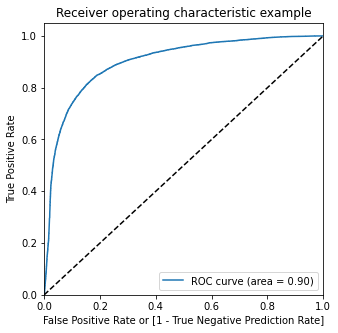

In [359]:
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [360]:
#Finding Optimal cut off point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.102021,0,1,1,0,0,0,0,0,0,0,0
1,0,0.188041,0,1,1,0,0,0,0,0,0,0,0
2,0,0.261287,0,1,1,1,0,0,0,0,0,0,0
3,0,0.268695,0,1,1,1,0,0,0,0,0,0,0
4,1,0.319910,0,1,1,1,1,0,0,0,0,0,0


In [361]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)


     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.681097  0.975417     0.386777   
0.2  0.2          0.745121  0.949213     0.541028   
0.3  0.3          0.787026  0.921456     0.652597   
0.4  0.4          0.814986  0.890457     0.739515   
0.5  0.5          0.829641  0.844803     0.814480   
0.6  0.6          0.826298  0.779766     0.872830   
0.7  0.7          0.805869  0.688998     0.922739   
0.8  0.8          0.766799  0.578037     0.955562   
0.9  0.9          0.636861  0.292564     0.981158   


In [362]:
#0.55 can be an optimal cutoff

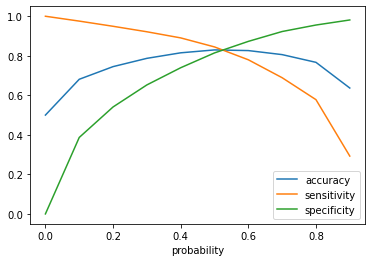

In [363]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [364]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_churn_pred
0,0,0.102021,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.188041,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.261287,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.268695,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.319910,0,1,1,1,1,0,0,0,0,0,0,0


In [365]:
# Calculating the ovearall accuracy again
metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred)

0.8301141352063214

In [366]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[12529  2278]
 [ 2753 12054]]


In [367]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity and specificity  of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))


print("Specificity = ",TN2 / float(TN2+FP2))


print("False Positive Rate = ",FP2/ float(TN2+FP2))

print ("Precision = ",TP2 / float(TP2+FP2))


print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))


Sensitivity =  0.8140744242587965
Specificity =  0.8461538461538461
False Positive Rate =  0.15384615384615385
Precision =  0.8410549818587776
True Negative Prediction Rate =  0.8198534223269206


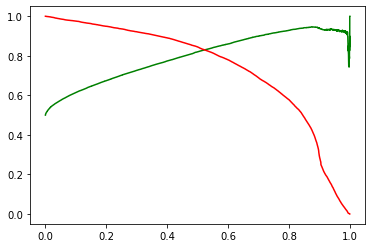

In [368]:
#Precision and recall trade-off
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [369]:
#Making Predictions on test data set
X_test[num_col2] = scaler.transform(X_test[num_col2])
X_test.head()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7_8
5209,0.070411,0.119900,0.135365,0.045591,0.096077,0.135735,0.0,0.0,0.0,0.0,0.0,0.0,0.006105,0.00000,0.064880,0.006379,0.064165,0.011334,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.007398,0.040480,0.043926,0.076901,0.140401,0.122223,0.050869,0.074906,0.148881,0.0,0.0,0.0,0.0,0.0,0.0,0.089277,0.149549,0.187805,0.0,0.000000,0.012647,0.000000,0.000000,0.0,0.0,0.081049,0.151391,0.184647,0.002760,0.002760,0.064400,0.012652,0.032575,0.029997,0.000000,0.000000,0.000000,0.009802,0.023234,0.048193,0.067334,0.030845,0.000364,0.006937,0.071750,0.000027,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.030100,0.061311,0.000169,0.00000,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.111111,0.106383,0.200000,0.110,0.110,0.130,0.177706,0.167939,0.198473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.188325
8268,0.015195,0.019640,0.033425,0.089135,0.146034,0.704056,0.0,0.0,0.0,0.0,0.0,0.0,0.026033,0.02946,0.037675,0.026657,0.038410,0.103648,0.007048,0.003537,0.061744,0.0,0.0,0.648724,0.031527,0.041504,0.091895,0.003605,0.007457,0.019967,0.090527,0.145434,0.735405,0.0,0.0,0.0,0.0,0.0,0.0,0.066867,0.111975,0.521365,0.0,0.015340,0.000000,0.248694,0.331776,0.0,0.0,0.076474,0.119066,0.503116,0.019156,0.045214,0.057789,0.026556,0.011774,0.039536,0.000508,0.001911,0.005814,0.026426,0.028414,0.052511,0.000000,0.000000,0.009055,0.009834,0.002226,0.119712,0.000000,0.015704,0.021595,0.0,0.0,0.0,0.006628,0.003025,0.089202,0.53125,0.000000,0.0,0.26738,0.19345,0.401349,0.105871,0.003209,0.995430,0.333333,0.085106,0.155556,0.030,0.225,0.225,0.048465,0.343511,0.343511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.077586,0.206695
2829,0.000000,0.000000,0.005366,0.000000,0.017686,0.078864,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.012849,0.000000,0.037006,0.125887,0.000000,0.012323,0.446551,0.0,0.0,0.000000,0.000000,0.023973,0.112077,0.000000,0.000000,0.000000,0.000000,0.000000

In [370]:
X_test=X_test[rfe_columns]
X_test.head()

,onnet_mou_7,onnet_mou_8,offnet_mou_8,loc_og_t2m_mou_8,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_7,std_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2m_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,aug_vbc_3g
5209,0.119900,0.135365,0.135735,0.011334,0.140401,0.122223,0.148881,0.149549,0.187805,0.184647,0.064400,0.029997,0.000000,0.000027,0.0,0.200000,0.198473,0.0,0.000000,0.0
8268,0.019640,0.033425,0.704056,0.103648,0.007457,0.019967,0.735405,0.111975,0.521365,0.503116,0.057789,0.039536,0.005814,0.119712,0.0,0.155556,0.343511,0.0,0.000000,0.0
2829,0.000000,0.005366,0.078864,0.125887,0.000000,0.000000,0.001607,0.000000,0.001109,0.057461,0.014138,0.189915,0.020429,0.000563,0.0,0.244444,0.070229,0.0,0.333333,0.0
14116,0.244198,0.143881,0.116199,0.024779,0.267336,0.159459,0.119162,0.335078,0.193214,0.177110,0.012352,0.026119,0.000000,0.088222,0.0,0.022222,0.167939,0.0,0.000000,0.0
5697,0.003166,0.005779,0.048242,0.099266,0.000000,0.000000,0.000000,0.000000,0.000000,0.037383,0.037009,0.264104,0.018562,0.000000,0.0,0.088889,0.045802,0.5,0.083333,0.0


In [371]:

X_test_SM = sm.add_constant(X_test)

In [372]:
#Predicting the target variable
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 5209     0.467304
8268     0.089084
2829     0.201994
14116    0.759793
5697     0.182541
19280    0.165012
18570    0.537007
14649    0.257149
6353     0.158837
14771    0.107575
dtype: float64


In [373]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
5209,0.467304
8268,0.089084
2829,0.201994
14116,0.759793
5697,0.182541


In [374]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
5209,0
8268,0
2829,0
14116,0
5697,0


In [375]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn_probability,Conv_prob
5209,0,0.467304
8268,0,0.089084
2829,0,0.201994
14116,0,0.759793
5697,0,0.182541


In [376]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn_probability,Conv_prob,test_churn_pred
5209,0,0.467304,0
8268,0,0.089084,0
2829,0,0.201994,0
14116,0,0.759793,1
5697,0,0.182541,0


In [377]:
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.8293658350790326

In [378]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[4118  819]
 [  77  237]]


In [379]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [380]:
# Sensitivity and Specificty of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

print("Specificity = ",TN3 / float(TN3+FP3))


print("False Positive Rate = ",FP3/ float(TN3+FP3))


print ("Precision = ",TP3 / float(TP3+FP3))

print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7547770700636943
Specificity =  0.8341097832691918
False Positive Rate =  0.16589021673080817
Precision =  0.22443181818181818
True Negative Prediction Rate =  0.9816448152562575


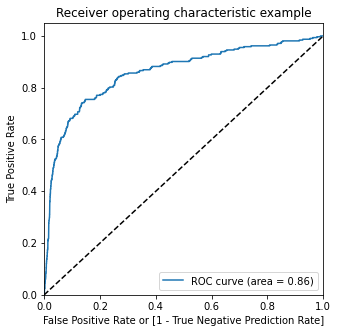

In [381]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

#### Accuracy of Train data 0.83 and test data set is 0.82

### PCA

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [383]:
X_train.shape

(16800, 126)

In [384]:
pca = PCA(random_state=42)

In [385]:
pca.fit(X_train)

PCA(random_state=42)

In [386]:
pca.components_

array([[ 1.50243267e-01,  1.73806686e-01,  1.61607780e-01, ...,
        -7.27490775e-02, -1.28768022e-03,  1.06184925e-01],
       [ 5.01533766e-02,  5.87606195e-02,  5.73015881e-02, ...,
         1.92097639e-01, -9.09269310e-04,  1.26126970e-01],
       [-8.97210645e-02, -1.31162184e-01, -1.25999724e-01, ...,
         7.42501522e-03,  8.69189100e-03,  1.16539864e-01],
       ...,
       [ 0.00000000e+00,  1.57637311e-16, -1.48096420e-16, ...,
         4.12797825e-17, -7.72028182e-17, -6.21682198e-18],
       [-0.00000000e+00,  3.61020641e-17, -8.02942387e-18, ...,
         2.49852646e-17,  5.95489447e-17,  2.91127623e-18],
       [ 0.00000000e+00, -9.99643303e-17,  2.99459955e-17, ...,
        -2.58418799e-17,  5.44846760e-17,  4.85868205e-18]])

In [387]:
pca.explained_variance_ratio_

array([3.61492451e-01, 1.67496714e-01, 1.03547515e-01, 7.88527651e-02,
       5.82108882e-02, 3.08634350e-02, 2.44179129e-02, 2.19379839e-02,
       1.99691004e-02, 1.98301180e-02, 1.67718751e-02, 1.21271167e-02,
       1.15186106e-02, 8.77428738e-03, 7.02028764e-03, 5.41101561e-03,
       5.18995473e-03, 4.16646874e-03, 4.03666867e-03, 3.46802304e-03,
       3.19642862e-03, 3.06132487e-03, 2.75704124e-03, 2.48332871e-03,
       2.29542406e-03, 2.13129190e-03, 1.71390202e-03, 1.56365344e-03,
       1.40567190e-03, 1.28993194e-03, 1.16561632e-03, 1.09506815e-03,
       1.03753388e-03, 8.66662795e-04, 7.19439249e-04, 7.09629152e-04,
       6.58424772e-04, 4.81242952e-04, 4.45592754e-04, 4.34609639e-04,
       4.29572637e-04, 4.16390076e-04, 3.90134093e-04, 3.34569966e-04,
       3.29459177e-04, 3.01734873e-04, 2.94781573e-04, 2.83890000e-04,
       2.65556040e-04, 2.34582097e-04, 2.06086293e-04, 1.81149683e-04,
       1.59906241e-04, 1.43095575e-04, 1.27205470e-04, 1.24419245e-04,
      

In [388]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [389]:
var_cumu

array([0.36149245, 0.52898916, 0.63253668, 0.71138944, 0.76960033,
       0.80046377, 0.82488168, 0.84681966, 0.86678877, 0.88661888,
       0.90339076, 0.91551787, 0.92703649, 0.93581077, 0.94283106,
       0.94824208, 0.95343203, 0.9575985 , 0.96163517, 0.96510319,
       0.96829962, 0.97136094, 0.97411799, 0.97660131, 0.97889674,
       0.98102803, 0.98274193, 0.98430559, 0.98571126, 0.98700119,
       0.98816681, 0.98926187, 0.99029941, 0.99116607, 0.99188551,
       0.99259514, 0.99325356, 0.99373481, 0.9941804 , 0.99461501,
       0.99504458, 0.99546097, 0.99585111, 0.99618568, 0.99651514,
       0.99681687, 0.99711165, 0.99739554, 0.9976611 , 0.99789568,
       0.99810177, 0.99828292, 0.99844282, 0.99858592, 0.99871312,
       0.99883754, 0.99894386, 0.99903993, 0.99912614, 0.99920288,
       0.99927138, 0.99933693, 0.99940048, 0.99945221, 0.99949802,
       0.999542  , 0.99958569, 0.99962801, 0.99966846, 0.99970464,
       0.99973922, 0.99977219, 0.99980435, 0.99983494, 0.99986

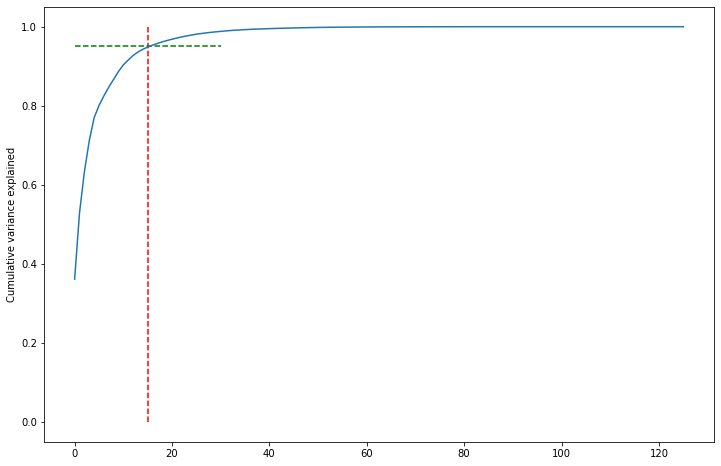

In [390]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [391]:
pca_final = IncrementalPCA(n_components=16)

In [392]:
df_train_pca = pca_final.fit_transform(X_train)

In [393]:
df_train_pca.shape

(16800, 16)

In [394]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [395]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4201, 16)

### Logistic Regression with PCA


In [396]:
log_pca = LogisticRegression()

In [397]:
model_pca = log_pca.fit(df_train_pca, y_train)

In [398]:
#Prediction on test data
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [399]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.82'

In [400]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [401]:
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[3922   22]
 [ 239   18]]


In [402]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [403]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9378719352535111
Sensitivity:- 0.07003891050583658
Specificity:- 0.994421906693712


In [404]:
#Making Prediction on Train dataset
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [405]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.84'

In [406]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [407]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[15713    87]
 [  914    86]]


In [408]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [409]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9404166666666667
Sensitivity:- 0.086
Specificity:- 0.994493670886076


#### The accuracy on Train data is 0.94 and the accuracy on test data is 0.93

### Random Forest with PCA

In [410]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [411]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

11


In [412]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

In [413]:
rf.fit(df_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.3s finished


RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [414]:
rf.oob_score_

0.9407142857142857

In [415]:
from sklearn.metrics import plot_roc_curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


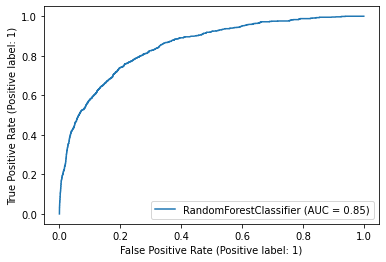

In [416]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

In [417]:
#Hyperparameter tuning for random forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [418]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [419]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [420]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [421]:
GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [422]:
grid_search.best_score_

0.9404761904761905

In [423]:
grid_search.best_params_

{'max_depth': 2,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [424]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [425]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [426]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [427]:
evaluate_model(rfc_model)

Train Accuracy : 0.9404761904761905
Train Confusion Matrix:
[[15800     0]
 [ 1000     0]]
--------------------------------------------------
Test Accuracy : 0.9388240895024994
Test Confusion Matrix:
[[3944    0]
 [ 257    0]]


####  The Accuracy on Train set is 0.94 and the Accuracy on test set is 0.93

#### Hence Random Forest with PCA or Logistic Regression with PCA can be considered as the best models

### Feature Importance

In [428]:

max_features = int(round(np.sqrt(X_train.shape[1])))    
print(max_features)

rf1 = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

11


In [429]:
# fit model
rf1_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.4s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=11,
                       oob_score=True, random_state=4, verbose=1)

In [430]:
# OOB score
rf1_model.oob_score_

0.9557738095238095

In [431]:
y_pred = rf1_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf1_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[3913   31]
 [ 172   85]]
Sensitivity: 	0.33
Specificity: 	0.99
ROC:    	 0.9


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [432]:
    # predictors
    features = ch_new.drop('churn_probability', axis=1).columns

    # feature_importance
    importance = rf1_model.feature_importances_

    # create dataframe
    feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
    feature_importance = feature_importance[['variables', 'importance_percentage']]

    # sort features
    feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
    print("Sum of importance=", feature_importance.importance_percentage.sum())
    feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_og_mou_8,6.816756
1,last_day_rch_amt_8,4.436617
2,loc_ic_mou_8,4.143504
3,loc_ic_t2m_mou_8,4.100814
4,roam_og_mou_8,3.695895
5,max_rech_amt_8,3.078642
6,loc_ic_t2t_mou_8,2.937019
7,roam_ic_mou_8,2.769329
8,vol_2g_mb_8,2.552429
9,loc_og_mou_8,2.365966


#### Top featured to predict the churn can be total_og_mou_8,last_day_rch_amt_8,loc_ic_mou_8,loc_ic_t2m_mou_8,roam_og_mou_8

### Predicting on test data set

In [433]:
ch_test = pd.read_csv("D:\\Upgrad\\Machine Learning 2\\telecom-churn-case-study-hackathon-38\\test.csv")

In [434]:
ch_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [435]:
ch_test.shape

(30000, 171)

In [436]:
ch_test.isnull().sum()

id                          0    
circle_id                   0    
loc_og_t2o_mou              316  
std_og_t2o_mou              316  
loc_ic_t2o_mou              316  
last_date_of_month_6        0    
last_date_of_month_7        202  
last_date_of_month_8        367  
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
onnet_mou_6                 1169 
onnet_mou_7                 1172 
onnet_mou_8                 1675 
offnet_mou_6                1169 
offnet_mou_7                1172 
offnet_mou_8                1675 
roam_ic_mou_6               1169 
roam_ic_mou_7               1172 
roam_ic_mou_8               1675 
roam_og_mou_6               1169 
roam_og_mou_7               1172 
roam_og_mou_8               1675 
loc_og_t2t_mou_6            1169 
loc_og_t2t_mou_7            1172 
loc_og_t2t_mou_8            1675 
loc_og_t2m_mou_6            1169 
loc_og_t2m_mou_7            1172 
loc_og_t2m_mou_8            1675 
loc_og_t2f_mou

In [437]:
churn_id = ch_test['id']

In [438]:
ch_test['tenure'] = (ch_test['aon']/30).round(0)


In [439]:
ch_test["avg_arpu_6_7_8"]= (ch_test['arpu_6']+ch_test['arpu_7']+ch_test['arpu_8'])/3

In [440]:
ch_test = ch_test[X.columns]

In [441]:
ch_test.shape

(30000, 126)

In [442]:
ch_test.isnull().sum() * 100 / ch_test.shape[0]

onnet_mou_6           3.896667 
onnet_mou_7           3.906667 
onnet_mou_8           5.583333 
offnet_mou_6          3.896667 
offnet_mou_7          3.906667 
offnet_mou_8          5.583333 
roam_ic_mou_6         3.896667 
roam_ic_mou_7         3.906667 
roam_ic_mou_8         5.583333 
roam_og_mou_6         3.896667 
roam_og_mou_7         3.906667 
roam_og_mou_8         5.583333 
loc_og_t2t_mou_6      3.896667 
loc_og_t2t_mou_7      3.906667 
loc_og_t2t_mou_8      5.583333 
loc_og_t2m_mou_6      3.896667 
loc_og_t2m_mou_7      3.906667 
loc_og_t2m_mou_8      5.583333 
loc_og_t2f_mou_6      3.896667 
loc_og_t2f_mou_7      3.906667 
loc_og_t2f_mou_8      5.583333 
loc_og_t2c_mou_6      3.896667 
loc_og_t2c_mou_7      3.906667 
loc_og_t2c_mou_8      5.583333 
loc_og_mou_6          3.896667 
loc_og_mou_7          3.906667 
loc_og_mou_8          5.583333 
std_og_t2t_mou_6      3.896667 
std_og_t2t_mou_7      3.906667 
std_og_t2t_mou_8      5.583333 
std_og_t2m_mou_6      3.896667 
std_og_t

In [443]:
for col in ch_test.columns:
    null_col = ch_test[col].isnull().sum() / ch_test.shape[0] * 100
    if null_col > 0:
        ch_test[col] = ch_test[col].fillna(ch_test[col].mode()[0])

In [444]:
ch_test.isnull().sum().sum()

0

In [445]:
ch_test_final = pca_final.transform(ch_test)

In [446]:
ch_test_final.shape

(30000, 16)

In [447]:
predict_probalbilty = rfc_model.predict(ch_test_final)

In [448]:
predict_probalbilty.shape

(30000,)

In [449]:
final_pred = pd.DataFrame({'id':churn_id,'churn_probability':predict_probalbilty})

In [450]:
final_pred.to_csv('D:\\Upgrad\\Machine Learning 2\\telecom-churn-case-study-hackathon-38\\submission.csv',index=False)